# Binary classification

In this notebook we will practise binary classification in 2D using the example of Logistic regression. We will use the example of prediction of heart failure that you are already familiar with. We will also compare binary classifiers with different pairs of features to see which markers are best predictive of the disease.

First we need to import the libraries. Run the cell below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Load the data

Now we will load the dataset. You can see that we have the diagnosis in column **HF**, with labels `0`, `1` and `2`, and three features, **EF**, **GLS** and **QRS**. Run the cells below to load and explore the dataset.

In [2]:
import pandas as pd
# read fine into a dataframe object
df = pd.read_csv('datasets/heart_failure_data_complete.csv')
# print the first few lines
df.head()

,HF,EF,GLS,QRS
0,0,50.922280,-19.57,88
1,0,54.601227,-19.00,86
2,0,50.000000,-21.00,99
3,0,50.819672,-18.74,85
4,0,53.191489,-19.78,86


In [3]:
# print labels
print('Labels: ', pd.unique(df['HF']))

Labels:  [0 1 2]


To fit a binary classifier we will only consider 2 classes:
* Healthy with label `0`
* HF with label either `1` or `2`

In the first part of this notebook we will select features **EF** and **GLS**. 

Run the code below to create the feature matrix `X` and label vector `y`.

In [4]:
# convert dataframe to numpy array
data = df.to_numpy()

# Create feature matrix with EF and GLS
X = data[:,[1,2]]

# scale the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create label vector with classes 0 and 1
y = data[:,0]
y[y==2]=1

# print properties
print('Feature matrix X dimensions: ', X.shape)
print('Target vector y dimensions: ', y.shape)
print('Labels: ', np.unique(y))

Feature matrix X dimensions:  (120, 2)
Target vector y dimensions:  (120,)
Labels:  [0. 1.]


### Plot the data

**Activity 1:** Complete the function `PlotData` and call it to plot the features `X` with different markers based on labels `y`.

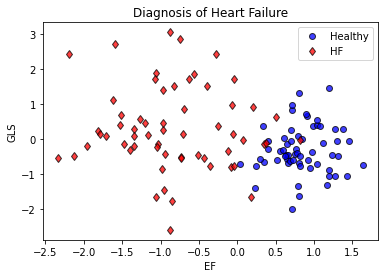

In [5]:
def PlotData(X,y):
    # plot class 0
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,markeredgecolor='k',label = 'Healthy')
    # plot class 1
    plt.plot(X[y==1,0],X[y==1,1],'rd',alpha=0.75,markeredgecolor='k',label = 'HF')
    
    # annotate the plot
    plt.title('Diagnosis of Heart Failure')
    plt.xlabel('EF')
    plt.ylabel('GLS')
    plt.legend()

# call the function to plot the dataset
PlotData(X,y)

### Fit and plot the logistic regression model

In the cell below we fit the logistic regression model. Run the cell

In [6]:
from sklearn.linear_model import LogisticRegression

# create model
model = LogisticRegression()

# Fit the model
model.fit(X,y)

LogisticRegression()

**Activity 2:** Plot the predicted model in 2D. Complete the function `PlotClassification` and run the code below to see the result.

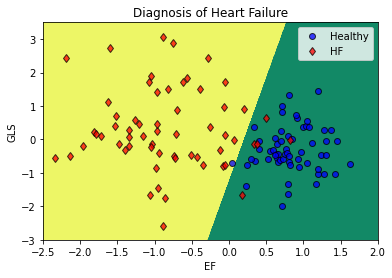

In [7]:
def PlotClassification(model,X,y):

    # Create an 1D array of samples for each feature
    x1 = np.linspace(-2.5, 2, 1000) 
    x2 = np.linspace(-3, 3.5, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2) 
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 

    # Predict labels for the whole feature space    
    y_pred = model.predict(Feature_space)
    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')
    
    # Plot data
    PlotData(X,y)
    
PlotClassification(model,X,y)

**Activity 3:** Complete function `PlotProbabilities` to plot the probability for the class 1. Change label form `1` to `0` to see the probability for class 0.

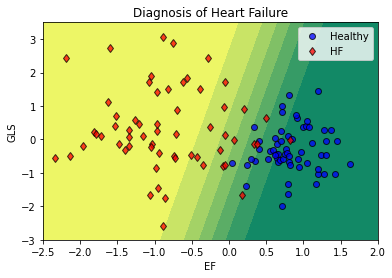

In [8]:
def PlotProbabilities(model,X,y,label=1):

    # Create an 1D array of samples for each feature
    x1 = np.linspace(-2.5, 2, 1000) 
    x2 = np.linspace(-3, 3.5, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2) 
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 

    # Predict labels for the whole feature space    
    proba = model.predict_proba(Feature_space)
    # Select the class
    p = proba[:,label]
    # Resahpe to 2D
    p = p.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, p, cmap = 'summer')
    
    # Plot data
    PlotData(X,y)
    
PlotProbabilities(model,X,y,1)

**Activity 4:** Logistic regression model in scikit-learn includes a Ridge penalty, that is controlled by hyperparameter `C`. In the cell below, try different values of alpha to see the effect of Ridge penalty on the predicted probabilities of class 1. You can try for example `1000`, `1`, `0.001`

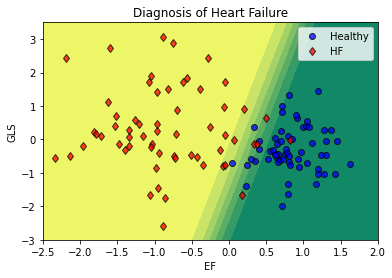

In [9]:
# set alpha
model = LogisticRegression(C = 1000)

# Fit the model
model.fit(X,y)

# Plot probabilities
PlotProbabilities(model,X,y)

### Evaluate performance of the classifier

The simplest way to evaluate performance of the classifier is using **accuracy score**. This score is a good evaluation measure for **balanced** datasets, where the number of samples of each class is similar. 

*Note: We only calculate cross-validated performance meansures in the examples below. This is fine, as long as no parameters are tuned. If we also tune parameters, the performance of the classifier need to be evaluated on test set.*

**Actvity 5:** Check whether our dataset is balanced.

In [10]:
print('Number of samples of class 0: ', y[y==0].shape[0])
print('Number of samples of class 1: ', y[y==1].shape[0])

Number of samples of class 0:  60
Number of samples of class 1:  60


**Activity 6:** Calculate the cross-validated accuracy for the default model. To do that complete the the function `Accuracy_CV`. *Hint:* Use function `cross_val_score`

In [11]:
from sklearn.model_selection import cross_val_score

# cross-validated accuracy
def Accuracy_CV(model,X,y):
    scores = cross_val_score(model,X,y)
    print('Accuracy CV: ',round(scores.mean(),2))

# select default Logistic Regression model
model = LogisticRegression()

# fit the model
model.fit(X,y)

# Evaluate accuracy
Accuracy_CV(model,X,y)

Accuracy CV:  0.95


For the balanced datasets, the accuracy is a good measure. For balanced binary dataset, accuracy higher than 0.5 means that the classifier managed to learn some information about the data (0.5 correspond to a random assignment of the labels). We can check this for our dataset by calculating also **sensitivity** and **specificity**, and check that they are both high.

**Activity 7:** Calculate sensitivity and specificity for the fitted model. 

*Hint:* Use function `recall_score`. Remember from the lecture, that recall for positive label set to 1 is sensitivity, while recall for positive label set to 0 is specificity. Positive labels is set using argument `pos_label`. Average recall can be calculated by setting `average='macro'`.

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score

# Predict labels using cross-validation
y_pred = cross_val_predict(model,X,y)

# Sensitivity
sensitivity = recall_score(y,y_pred,pos_label = 1)
print('Sensitivity: ',round(sensitivity,2))

# Specificity
specificity = recall_score(y,y_pred,pos_label = 0)
print('Specificity: ',round(specificity,2))

# Average recall
mean_recall = recall_score(y,y_pred,average='macro')
print('Mean Recall: ',round(mean_recall,2))

Sensitivity:  0.92
Specificity:  0.98
Mean Recall:  0.95


<img src="images/QRS.png" width = "200" style="float: right;"> 
## Exercise 2: Compare classifiers

Global longitudinal strain is difficult to estimate correctly due to manual measurements that need to be performed, resulting in poor reproducibility. Researchers believe, that GLS could be replaces by duration of QRS interval extracted from ECG, that is much easier to measure. 

Your task is to compare the classifier that predicts heart failure from EF and GLS with the classifier that predict HF from EF and QRS.

### Create dataset with EF and QRS
Run the code below to create a feature matrix `X2` that contains EF and QRS.

Text(0, 0.5, 'QRS')

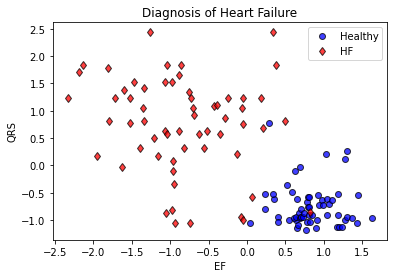

In [13]:
# Create the feature matrix with EF and QRS
X2 = data[:,[1,3]]
X2 = scaler.fit_transform(X2)

# Plot the new dataset
PlotData(X2,y)
plt.ylabel('QRS')

### Task 1: Fit and plot the model

Fit the default Logistic regression model to the EF QRS dataset and plot the classification results using function `PlotClassification`.

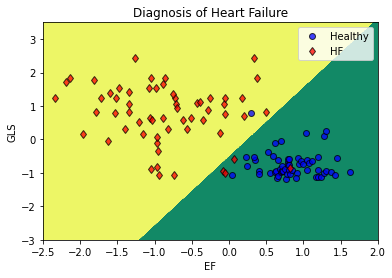

In [14]:
# select the model
model2 = LogisticRegression()

# fit the model
model2.fit(X2,y)

# plot classification results
PlotClassification(model2,X2,y)

### Task 2: Performance

Complete the function `EvaluatePerformance` to calculate **cross-validated**
* accuracy
* sensitivity
* specificity
* average recall

Run the function to print out the performance measures and compare to the EF GLS dataset. Which of the dataset is better for prediction of heart failure?

**Answer:** The new EF QRS model is better or equal in all performace measures than EF GLS. In particular, sensitivity of the  model, which is ability to recognise patients with HF, has improved.

*Note: We are not tuning any parameters here, so CV score is suitable for final evaluation of the performance. However, as soon as we tune the parameters, final performance has to be evaluated on the test set.*

In [15]:
def EvaluatePerformance(model,X,y):
    
    # accuracy
    scores = cross_val_score(model,X,y)
    print('Accuracy: ', round(scores.mean(),2))
    
    # Predict labels using cross-validation
    y_pred = cross_val_predict(model,X,y)

    # Sensitivity
    sensitivity = recall_score(y,y_pred,pos_label = 1)
    print('Sensitivity: ',round(sensitivity,2))

    # Specificity
    specificity = recall_score(y,y_pred,pos_label = 0)
    print('Specificity: ',round(specificity,2))

    # Average recall
    mean_recall = recall_score(y,y_pred,average='macro')
    print('Mean Recall: ',round(mean_recall,2))

          
# Calculate performance for EF QRS dataset
EvaluatePerformance(model2,X2,y)

Accuracy:  0.96
Sensitivity:  0.93
Specificity:  0.98
Mean Recall:  0.96


### Task 3: Tuning the Ridge penalty (optional)

Find out whether the performance of the EF QRS model can be further improved by tuning the hyperparameter `C` that controls the strength of Ridge regularisation. 
* Use function `GridSearchCV` to tune `C`
* Print out the best parameter `C` and best score
* Plot the classification boundary and the probabilites for class 1
* Calculate performance all measures for the new model

In [16]:
from sklearn.model_selection import GridSearchCV

# model
model = LogisticRegression()

# parameter grid
param = {'C':np.logspace(-3,3,7)}

# grid search 
g = GridSearchCV(model, param,cv=5)
g.fit(X2,y)

# best model
best_model = g.best_estimator_

# print best accuracy score
print('Accuracy: ', round(g.best_score_,2))

# print best C
print('C: ', best_model.C)

Accuracy:  0.96
C:  0.1


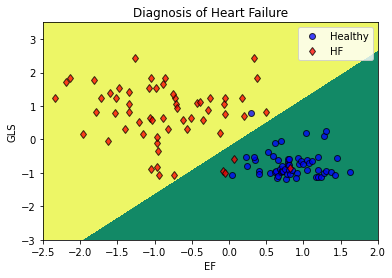

In [17]:
# plot the decision boundary
PlotClassification(best_model,X2,y)

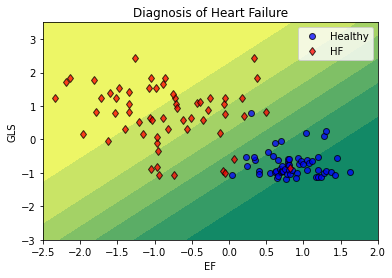

In [18]:
# plot the probability for class 1
PlotProbabilities(best_model,X2,y,label=1)

In [19]:
# calculate performance measures
EvaluatePerformance(best_model,X2,y)

Accuracy:  0.96
Sensitivity:  0.93
Specificity:  0.98
Mean Recall:  0.96


Is the performance of the tuned Logistic Regression better than default?

**Answer:** There does not seem to be significant improvement in performance.

*Note: Because we are tuning parameters here, CV score is **not** suitable for final evaluation of the performanceand test set is needed for that.*